# **Voila và Ipython**
> Trong phần này chúng ta sẽ sử dụng widgets của Ipython và Voila để giúp chúng ta biến jupyter notebook của mình thành 1 app

In [ ]:
import voila
from ipywidgets import widgets
from fastai.vision.all import *

# Tải model
> Chúng ta đã lưu model từ trước, giờ chỉ cần load lại model lên thôi

In [ ]:
# Load model:
fname = 'models/model_PR2.pkl'
learner = load_learner(fname)

# Máy local
> Các bước sau đây chúng ta có thể thực hiện trên máy local của mình để thực hành việc sử dụng widgets của ipython.

In [ ]:
# Tạo button upload dữ liệu:
image_upload = widgets.FileUpload()

In [ ]:
image_upload

FileUpload(value={}, description='Upload')

<AxesSubplot:>

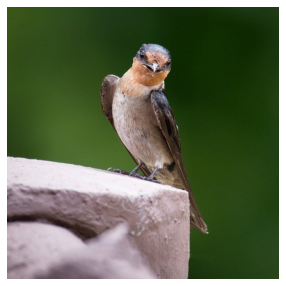

In [ ]:
# Lấy dữ liệu từ widgets:
# Chỉ lấy ảnh cuối cùng
img = PILImage.create(image_upload.data[-1])
PILImage.show(img)

In [ ]:
# Chúng ta có thể dùng Widgets Output để show ảnh:
output_img = widgets.Output()
output_img.clear_output()
with output_img: display(img.to_thumb(128, 128))
output_img

Output()

In [ ]:
# Lấy kết quả dự báo:
pred, pred_idx, probs = learner.predict(img)

In [ ]:
# Sử dụng Lable của widgets để trả về kết quả dự báo:
label_img = widgets.Label()
label_img.value = f"Prediction: {pred}; Probability: {probs[pred_idx]: .04f}"

Label(value='Prediction: swift; Probability:  0.8505')

In [ ]:
# Tạo button để thực hiện dự báo:
button_run = widgets.Button(description="Dự báo")

In [ ]:
# Tạo process lấy ảnh và dự báo kết quả:
def on_click_classify(change):
    # Lấy image cuối cùng của Upload:
    img = PILImage.create(image_upload.data[-1])
    
    # Tạo widget show ảnh:
    output_img.clear_output()
    with output_img: display(img.to_thumb(128, 128))
    output_img
    
    # Dự báo kết quả:
    pred, pred_idx, probs = learner.predict(img)
    
    # Tạo widget dán nhãn & dán nhãn kết quả dự báo:
    label_img.value = f"Prediction: {pred}; Probability: {probs[pred_idx]: .04f}"
    
button_run.on_click(on_click_classify)

In [ ]:
widgets.VBox([widgets.Label('Chọn loại chim bạn muốn dự đoán:'),
      image_upload, button_run, output_img, label_img])

Chỉ đơn giản có vậy, chúng ta có sẽ tao riêng 1 notebook để làm việc này.

# Binder
> Chúng ta sẽ xây dựng server trên binder để chạy được notebook. Vào [binder](https://mybinder.org/)

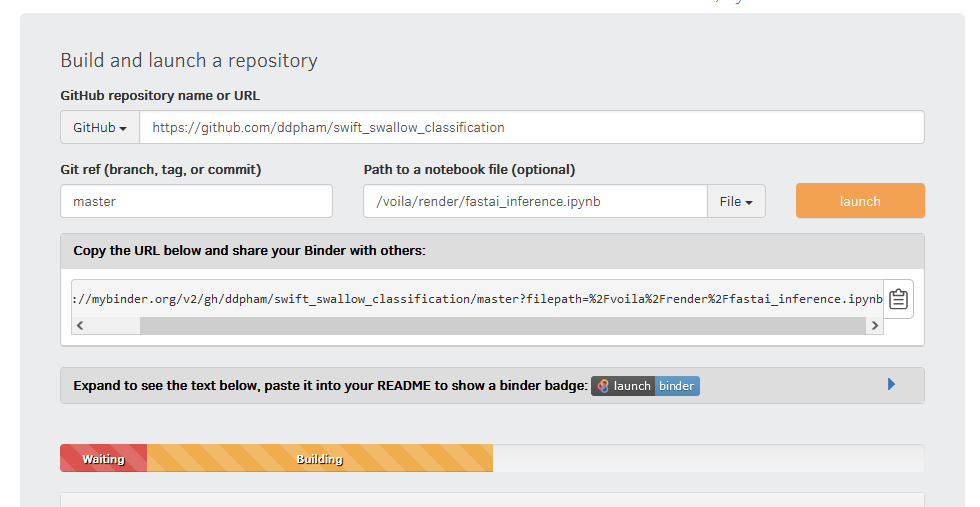

Về bản chất binder giúp chúng ta tạo ra 1 docker chạy trên server của họ, xây dựng sẵn môi trường theo file requirements.txt. Sau đó bạn có thể mở link ra, vào `nbs/fastai_inference.ipynb` để chạy file.

Sau khi xong, bạn copy link binder, của tối sẽ ntn:

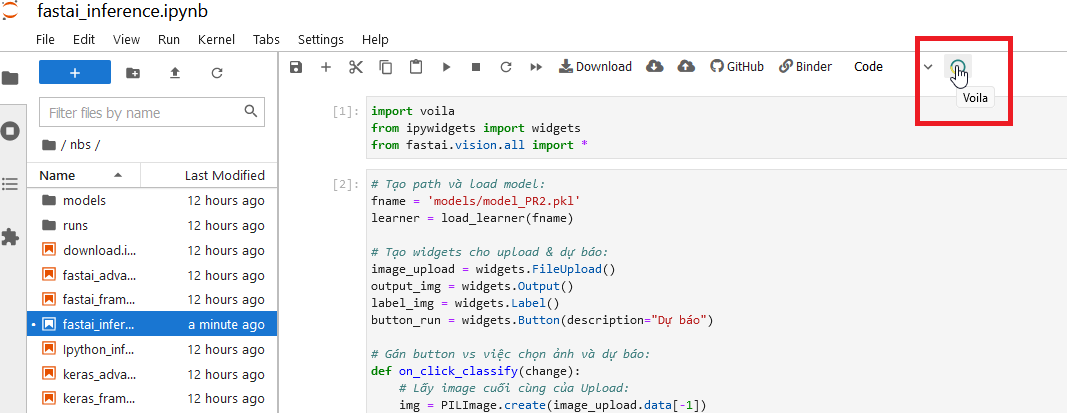

Hãy chạy các cell trong Jupyter, sau đó convert ra voila vs biểu tượng trên cùng góc bên phải, bạn sẽ có kết quả ntn:

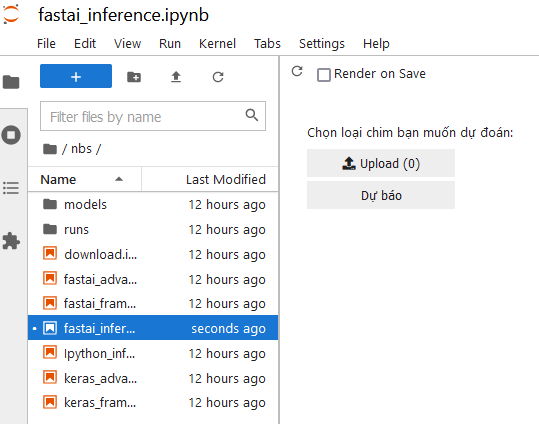

Hãy thử dự đoán với 2 ảnh xem sao nhé (bạn phải download ảnh về máy):
1) https://en.wikipedia.org/wiki/Swift_(bird)#/media/File:Apus_apus_01.

2) https://en.wikipedia.org/wiki/Swallow#/media/File:Wire_tailed_swallow2_@kannur.jpg


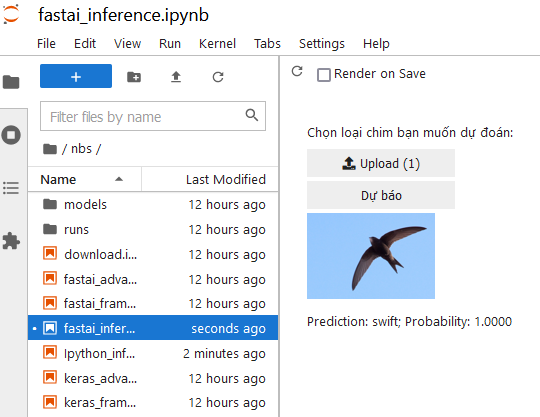
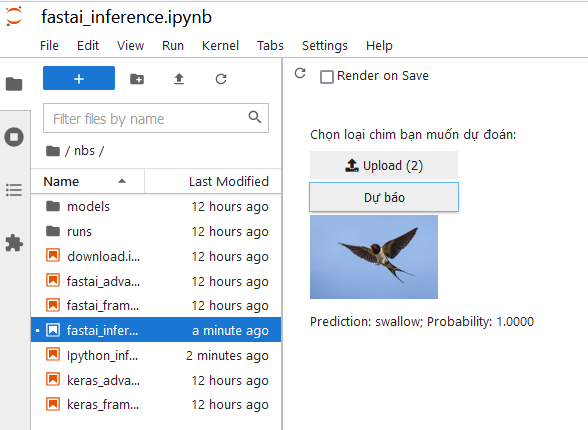